<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_Null_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [ ]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 222 (delta 7), reused 0 (delta 0), pack-reused 207 (from 1)
Receiving objects: 100% (222/222), 46.31 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (75/75), done.


#Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading

In [ ]:
df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_cleaned.csv')
display(df.head())

,Patient_ID,Visit_ID,Date_of_birth,Symptom_onset_date,Diagnosis_date,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,1,1,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,>80,...,11.0,4.0,4.0,0.0,7.0,3,14.0,0.785714,37.0,35.0
1,1,2,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,60-80,...,13.0,0.0,6.0,0.0,7.0,4B,19.0,0.684211,35.0,30.0
2,1,3,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,12.0,1.0,3.0,2.0,7.0,4B,23.0,0.565217,35.0,25.0
3,1,4,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,1.0,40-60,...,12.0,4.0,5.0,0.0,7.0,4B,26.0,0.538462,34.0,45.0
4,1,5,1941-06-22,2018-10-01,2019-12-12,0,77.0,spinale,NaN,ND,...,11.0,1.0,4.0,0.0,7.0,4B,29.0,0.689655,28.0,50.0


#Null

In [ ]:
fvc_greater_than_80 = df[df['FVC'] == '>80']
fvc_60_to_80 = df[df['FVC'] == '60-80']
fvc_40_to_60 = df[df['FVC'] == '40-60']
fvc_less_than_40 = df[df['FVC'] == '<40']

In [ ]:
display(df.groupby('FVC_Category')['ALSFRS_R'].describe())

/tmp/ipython-input-4158202987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('FVC_Category')['ALSFRS_R'].describe())


,count,mean,std,min,25%,50%,75%,max
FVC_Category,,,,,,,,
<40,125.0,21.592000,7.680197,0.0,17.0,21.0,26.0,43.0
40-60,179.0,27.234637,7.574404,4.0,22.0,28.0,32.0,43.0
60-80,229.0,31.004367,7.463653,8.0,27.0,32.0,36.0,45.0
>80,591.0,36.573604,6.061625,12.0,33.5,37.0,41.0,48.0


##MRC_Bulbar

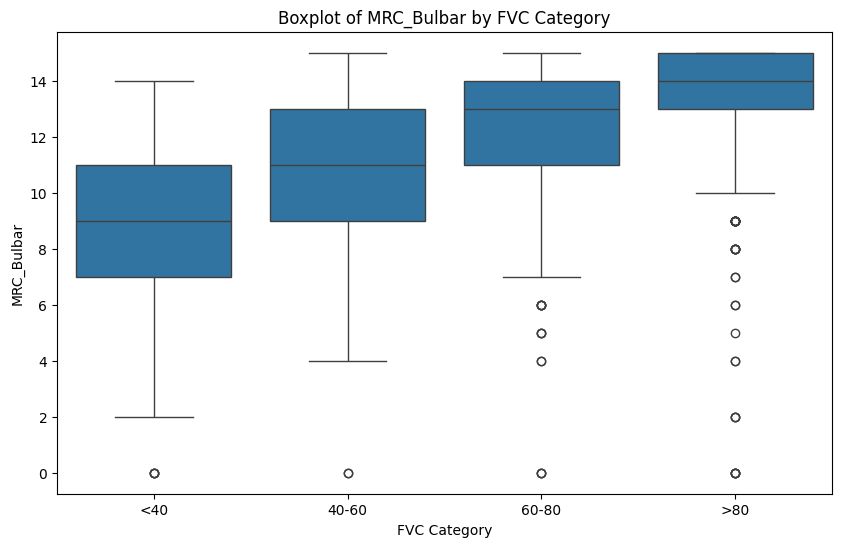

In [ ]:
# Create a new column for FVC categories for plotting
df['FVC_Category'] = pd.Categorical(df['FVC'], categories=['<40', '40-60', '60-80', '>80'], ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC_Category', y='MRC_Bulbar')
plt.title('Boxplot of MRC_Bulbar by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('MRC_Bulbar')
plt.show()

##CNS_Linear_Score

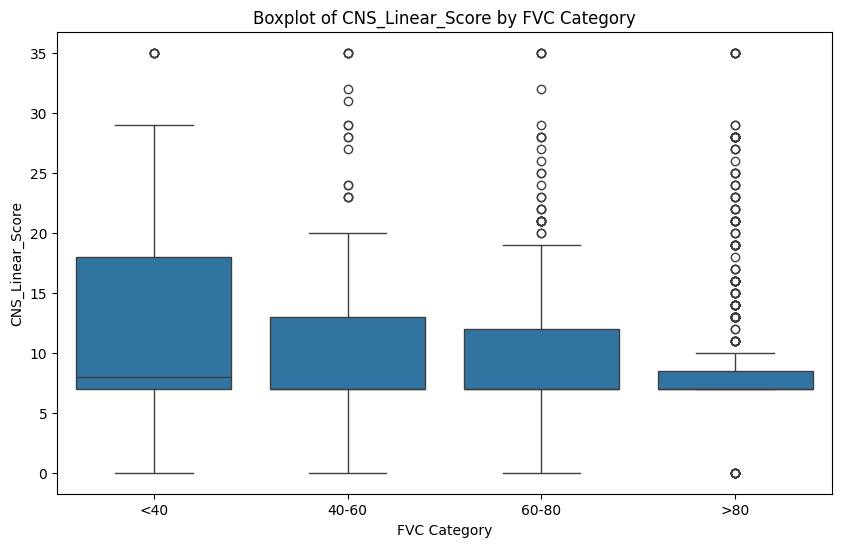

In [ ]:
# Create a new column for FVC categories for plotting
df['FVC_Category'] = pd.Categorical(df['FVC'], categories=['<40', '40-60', '60-80', '>80'], ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC_Category', y='CNS_Linear_Score')
plt.title('Boxplot of CNS_Linear_Score by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('CNS_Linear_Score')
plt.show()

##ALSFRS_R

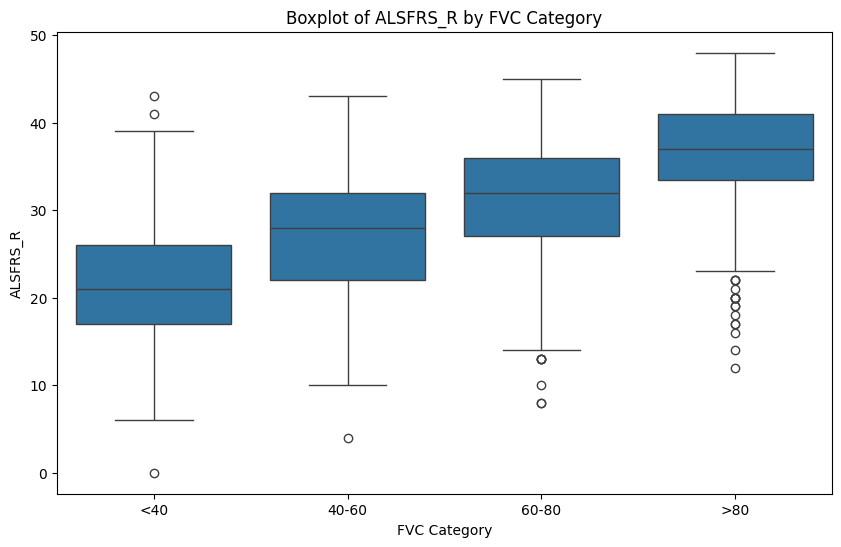

In [ ]:
# Create a new column for FVC categories for plotting
df['FVC_Category'] = pd.Categorical(df['FVC'], categories=['<40', '40-60', '60-80', '>80'], ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC_Category', y='v')
plt.title('Boxplot of ALSFRS_R by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('ALSFRS_R')
plt.show()

In [ ]:
nd_fvc_count = df[df['FVC'] == 'ND'].shape[0]
display(nd_fvc_count)

288

In [ ]:
nd_fvc_less_than_4_alsfrs_r = df[(df['FVC'] == 'ND') & (df['ALSFRS_R'] <= 9)]
display(len(nd_fvc_less_than_4_alsfrs_r))

77

In [ ]:
nd_fvc_less_than_4_alsfrs_r = df[(df['FVC'] == 'ND') & (df['ALSFRS_R'] > 45)]
display(len(nd_fvc_less_than_4_alsfrs_r))

4

##ALSAQ_5

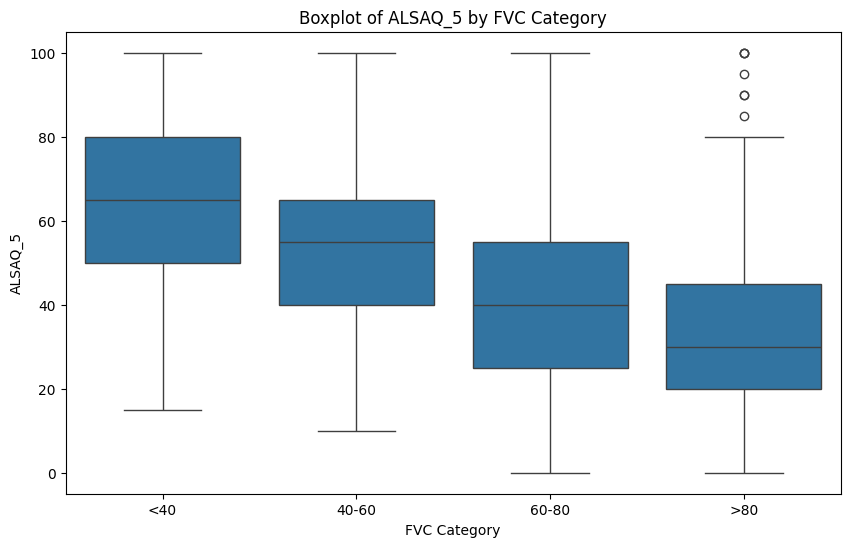

In [ ]:
# Create a new column for FVC categories for plotting
df['FVC_Category'] = pd.Categorical(df['FVC'], categories=['<40', '40-60', '60-80', '>80'], ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FVC_Category', y='ALSAQ_5')
plt.title('Boxplot of ALSAQ_5 by FVC Category')
plt.xlabel('FVC Category')
plt.ylabel('ALSAQ_5')
plt.show()